In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [2]:
# NO CODE

x = make_array(3, 4, 5)
probs = make_array(0.35, 0.5, 0.15)
dist_X = Table().values(x).probabilities(probs)
dist_2 = Table().values(x+6).probabilities(probs)
dist_3 = Table().values(3*x).probabilities(probs)
dist_4 = Table().values(-3*x).probabilities(probs)

y = make_array(3, 4, 5)
probs_Y = make_array(0.55, 0.1, 0.35)
dist_Y = Table().values(y).probabilities(probs_Y)

(ch6.2)=
## Simplifying the Calculation ##

To calculate the variance, we have had to find each deviation, square it, and then find the weighted average of of the squares. It's worth seeing if we can reduce this work.

### Linear Transformations ###

When we change units, we usually multiply the variable by a constant. For example if $X$ is a length in inches then $Y = 2.54X$ is the same length in centimeters. If $X$ is a temperature in degrees Celsius then $Y = (9/5)X + 32$ is the same temperature in degrees Fahrenheit. Both of these are linear transformations of $X$.

We will now show that if you know the SD of $X$ then you can easily find the SD of any linear transformation of $X$.

For a constant $b$, let $Y = X+b$. Then the probability histogram of $Y$ is the probability histogram of $X$ slid along the horizontal axis by $b$ units. The slide doesn't affect the spread. So

$$
SD(X+b) ~ = ~ SD(X) ~~~~~ \text{ for all } b
$$

Of course you can prove this by algebra, but it's clear from imagining the probability histograms or visualizing them as in the figure below. In the figure, $b = 6$.

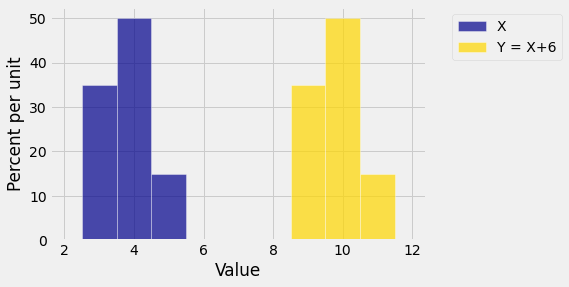

In [3]:
# NO CODE

Plots('X', dist_X, 'Y = X+6', dist_2)

Now let $Y = aX$ for a positive constant $a$. Here are the probability histograms of $X$ and $Y = 3X$ for $X$ as in the example above.

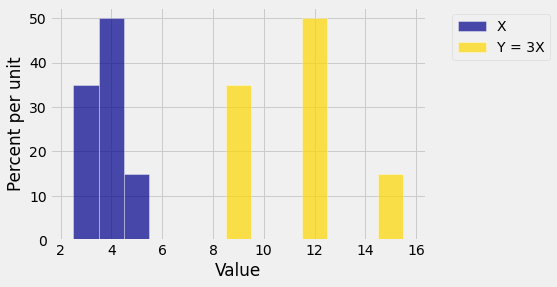

In [4]:
# NO CODE

Plots('X', dist_X, 'Y = 3X', dist_3)

Bars that were separated by one horizontal unit in the histogram of $X$ are separated by 3 horizontal units in the histogram of $Y$. So the SD of $Y$ is 3 times the SD of $X$. In general,

$$
SD(aX) ~ = ~ aSD(X) ~~~~ \text{ for } a > 0
$$

If $a < 0$ then we have to be a little more careful. The figure below show the probability histograms of $X$ and $Y = -3X$.

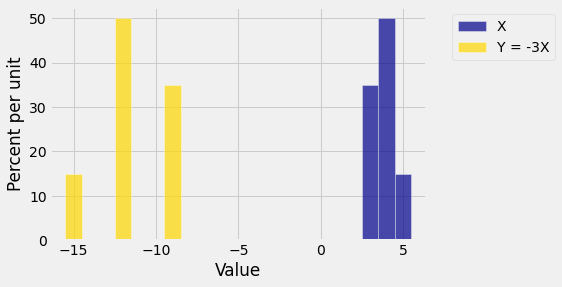

In [5]:
# NO CODE

Plots('X', dist_X, 'Y = -3X', dist_4)

The figure reminds us that if $a < 0$ then multiplication by $a$ has two stages: first a multiplication by $\vert a \vert$ which affects the SD, and then a multiplication by $-1$ which flips the histogram about the vertical axis and doesn't affect the SD. 

Thus

$$
SD(aX) ~ = ~ \vert a \vert SD(X) ~~~~ \text{ for all } a
$$

Put these results together to see that 

$$
SD(aX + b) ~ = ~ \vert a \vert SD(X)
$$

Because variance is the square of the SD,

$$
Var(aX + b) ~ = ~ a^2 Var(X)
$$

Note that while expectation has the linearity property $E(aX + b) = aE(X) + b$, neither the variance nor the SD have that property.

For example:

- If $X$ is a temperature in degrees Celsius and $Y = (9/5)X + 32$ is $X$ converted to degrees Fahrenheit, then $E(Y) = (9/5)E(X) + 32$ and $SD(Y) = (9/5)SD(X)$.
- If $Y = 10 - X$ then $E(Y) = 10 - E(X)$ and $SD(Y) = SD(X)$.

Make a note that $Var(-X) = Var(X)$. This result will be useful in later calculations.

### A Different Way of Calculating Variance ###

An algebraic simplification helps reduce the labor in the calculation of the variance.

$$
\begin{align*}
Var(X) ~ &= ~ E((X - \mu_X)^2) \\
&= ~ E(X^2 - 2X\mu_X + \mu_X^2) \\
&= ~ E(X^2) -2\mu_XE(X) + \mu_X^2 \\
&= ~ E(X^2) - 2\mu_X^2 + \mu_X^2 \\
&= ~ E(X^2) - \mu_X^2
\end{align*}
$$

We have shown the *the variance is the expectation of the square minus the square of the expectation*.

This formula for the variance eliminates the need to calculate all the deviations from mean. 

For example, if $X$ is the number of spots on one roll of a die, then $\mu_X = 3.5$ by symmetry, and

$$
Var(X) ~ = ~ \sum_{i=1}^6 i^2\cdot\frac{1}{6} ~ - ~ 3.5^2
~ \approx ~ 2.917
$$

So

$$
SD(X) ~ = ~ \sqrt{Var(X)} ~ \approx ~ 1.71
$$

In [6]:
faces = np.arange(1, 7)
var_X = sum((faces**2)/6) - 3.5**2
sd_X = var_X**0.5
var_X, sd_X

(2.916666666666668, 1.7078251276599334)

In the previous section we saw that the random variable $Y$ with distribution given by 

|$~~~~~~~~~~ y$| $3$ | $4$ | $5$ |
|-------------:|:---:|:---:|:---:|
|$P(Y = y)$ | $0.55$ | $0.1$ | $0.35$ |

has expectation 3.8 and SD approximately 0.927. Let's confirm that we get the same SD by our new method.

$$
Var(Y) ~ = ~ 9(0.55) + 16(0.1) + 25(0.35) ~ - ~ 3.8^2 ~ = ~ 0.86
$$

and therefore

$$
SD(Y) ~ = ~ \sqrt{0.86} ~ \approx ~ 0.927
$$

as before.

In [7]:
var_Y = 9*0.55 + 16*0.1 + 25*0.35 - 3.8**2
sd_Y = var_Y ** 0.5
var_Y, sd_Y

(0.8600000000000012, 0.927361849549571)